<a href="https://colab.research.google.com/github/jrneliodias/analise_auxilio_ifpa_2020/blob/main/An%C3%A1lise_Aux%C3%ADlio_IFPA_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exporta-se as tabelas excel em Dataframes

In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

# importando os dados do das planilhas do Excel

tab_alunos_dig  = pd.read_excel('/content/drive/My Drive/Colab Notebooks/AUXILIO DIGITAL.xlsx')
tab_alunos_perm = pd.read_excel('/content/drive/My Drive/Colab Notebooks/AUXÍLIO PERMANÊNCIA 2020.xlsx')

# Como cria-se vários dataframes, usa-se o método concat para juntá-las em uma só em colunas.
Alunos_grad_df  = pd.concat( [pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Controle e Automação.xlsx'    , usecols='A'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Biologia.xlsx'                , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Eletrotecnica Industrial.xlsx', usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Física.xlsx'                  , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Geografia.xlsx'               , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Gestão Hospitalar.xlsx'       , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Gestão Pública.xlsx'          , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/História.xlsx'                , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Letras.xlsx'                  , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Matemática.xlsx'              , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Pedagogia.xlsx'               , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Química.xlsx'                 , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Saneamento Ambiental.xlsx'    , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/TADS.xlsx'                    , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/Telecom.xlsx'                 , usecols='B'),
                              pd.read_excel( '/content/drive/My Drive/Colab Notebooks/E. Materiais.xlsx'            , usecols='B')], axis =1)

# Nomeia-se as colunas
Alunos_grad_df.columns = ['Alunos_ECA','Alunos_Bio','Alunos_Eind','Alunos_Fis','Alunos_Geo','Alunos_Ghosp','Alunos_GPub','Alunos_Hist',
                          'Alunos_Let','Alunos_Mat','Alunos_Ped','Alunos_Qui','Alunos_SanAmb','Alunos_tads' ,'Alunos_Tele' ,'Alunos_Emat' ]


,Alunos_ECA,Alunos_Bio,Alunos_Eind,Alunos_Fis,Alunos_Geo,Alunos_Ghosp,Alunos_GPub,Alunos_Hist,Alunos_Let,Alunos_Mat,Alunos_Ped,Alunos_Qui,Alunos_SanAmb,Alunos_tads,Alunos_Tele,Alunos_Emat
0,ADEMAR DE LUCAS DOS SANTOS PONTES,ADAN RODRIGUES DE OLIVEIRA,ABRAÃO LÍBBNO DAMASCENO MIRANDA,ABRAAO ROBERTO RODRIGUES DE ARAUJO,ADRIANA NOGUEIRA GOMES,ADRINE DO CARMO SANTOS,ADNA VITÓRIA BOTELHO SARAIVA,ADRIELLE SOUSA QUEIROZ,ABNER MATHEUS DE JESUS PENA,ADEMIR JULIO DOS REMEDIOS,ABIGAIL SARAI MODESTO DO ROSÁRIO,ABDA QUÉREM DE OLIVEIRA PEREIRA,ABIMAEL NONATO DE SOUZA,ADRIANO VILHENA PINTO,ADALTO SILVA DOS REIS,ADREA CRISTINA SOARES DA SILVA
1,ADRIE JUNIOR SERRANO DA SILVA MOOIJ,ADRIA CAROLINE FRANCA RODRIGUES,ADAMILTON LUNA MENDONÇA,ADALBERTO XAVIER FEITOSA DA FONSECA,ADRIELLY DUARTE FERREIRA,ANA CLARA ARAÚJO DOS SANTOS,ADRIANE SOUSA NASCIMENTO,ALEXANDRE DANIEL GONCALVES NUNES,ADRIANNE CRISTINE SARAIVA SANTOS DOS SANTOS,AÉLISSON DA SILVA MIRANDA,ADRIANA CORRÊA DA SILVA,ADOLFO DE SOUZA VIEIRA,ADAILSON DE SOUZA RAMOS,ADRIELLE CRISTINA CUNHA DE SOUZA,ALDO CESAR LOBO FIGUEIREDO,ADRIELE MARQUES GOMES
2,ADRIEL BRITO DA SILVA,ADRIANE ROBERTA CASTRO HOLANDA,ALAN NUNES GOMES,ADRIANO SOUZA ROCHA,ADYS RIGUEL LUZ MACIEL,ANA RAISSA RISUENHO DOS SANTOS,ALAN MATHEUS DE SOUZA VIEIRA,ANA KESSIA DA COSTA MELO,ADRIENNY CAROLINA RAMOS SOUZA,ALAN ARAUJO DE ARAUJO,ADRIANA DA COSTA MAFRA,ADRIANO SILVA DE SOUZA,ADELAN NUNES DA COSTA,AILSON PENA DOS SANTOS,ANTONIO MARCOS PINHEIRO MONTEIRO,AGATHA ROBERTA COUTO QUEMEL
3,AHYLTON DA SILVA CAMPOS,ADRIANO JEFFERSON SOARES MODESTO,ANTONIO ELTON DA SILVA CORRÊA,ALCEMIRO PAES DE MORAES JÚNIOR,ALANA GLENDA PORTAL AMADOR,ARTHUR SALOMÃO GARCIA BEGOT,ALICIA DA SILVA NUNES,ANDERSON PAULO SANTOS PEREIRA,AELIELMA BRAGA FAVACHO,ALDO PALHETA PEREIRA,ADRIANA DO SOCORRO DE CASTRO MORAES,ÁDRIA PEREZ BESSA SARAIVA,ADRIEL ALVES PEREIRA,ALBERT IVY LIMA PEREIRA,ARIANE DA MATA COSTA,ALDENICE DOS REIS DIAS
4,ALBERTO SOLARY DA SILVA,ADRIEL BRENO PAMPLONA SILVA,ANTONIO WELLINGTON SILVA SOUZA,ALESSANDRO DE SOUZA VALLE,ALESSANDRA LABELLE PEREIRA SILVA,BEATRIZ SANTOS DE OLIVEIRA,ALINE MIRANDA DA SILVA,ANDRE LUIZ CARVALHO CHAVES,ALECSON CASTRO FERREIRA,ALMIR JUNIOR DE SOUZA,ADRIANA DOS SANTOS PORTELA,ALDA LUCIA COSTA FONSECA,AIME VICTORIA DE SOUZA NAVEGANTES,ALDO CESAR LOBO FIGUEIREDO FILHO,ARTHUR LEONARDO BRAZ DA SILVA,AMANDA DE PAULA DA SILVA DOS SANTOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WILKA DE SOUSA BARBOSA,NaN,NaN,NaN,NaN,NaN
319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WOSHYGNTON ALEXANDRE FREITAS CARNEIRO,NaN,NaN,NaN,NaN,NaN
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YNGRID AMANDA DA SILVEIRA SILVA,NaN,NaN,NaN,NaN,NaN
321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YWLLY SUÉLLEN RODRIGUES DO CARMO LAMEIRA,NaN,NaN,NaN,NaN,NaN


# Separa-se os alunos indeferidos e deferidos nos auxílios em tabelas diferentes


In [3]:
# Ajustando os nomes da coluna da tabela de Auxílio Permanente
tab_alunos_perm.columns = ["ALUNOS", "RESULTADO"]

# fazendo duas séries com apenas com os alunos deferidos e refazendo os index's
df_alunos_dig_def  = tab_alunos_dig[tab_alunos_dig['RESULTADO']  =='DEFERIDO']['ALUNOS'].reset_index(drop=True)
df_alunos_perm_def = tab_alunos_perm[tab_alunos_perm['RESULTADO']=='DEFERIDO']['ALUNOS'].reset_index(drop=True)

# fazendo duas séries com apenas com os alunos indeferidos e refazendo os index's
df_alunos_dig_indef  = tab_alunos_dig[tab_alunos_dig['RESULTADO']  =='INDEFERIDO']['ALUNOS'].reset_index(drop=True)
df_alunos_perm_indef = tab_alunos_perm[tab_alunos_perm['RESULTADO']=='INDEFERIDO']['ALUNOS'].reset_index(drop=True)



Transforma-se a série de alunos deferidos e o dataframe com os alunos da graduação em conjuntos para obter a interseção entre eles, depois em o resultado lista  e arruma-se em ordem alfabética. 

In [4]:
# Lista dos alunos que possuem os dois auxílios
alunos_ambos_aux_grad =  set(df_alunos_dig_def) & set(df_alunos_perm_def) & set(Alunos_grad_df.values.flatten())

# Alunos que possuem apenas um dos auxílios 
alunos_grad_dig  =  set(df_alunos_dig_def)  & set(Alunos_grad_df.values.flatten())
alunos_grad_perm =  set(df_alunos_perm_def) & set(Alunos_grad_df.values.flatten())

Alunos_def_grad_dig  = pd.Series(sorted( list( alunos_grad_dig  - alunos_ambos_aux_grad )))
Alunos_def_grad_perm = pd.Series(sorted( list( alunos_grad_perm - alunos_ambos_aux_grad )) )

Alunos_indef_grad_dig  = pd.Series(sorted( list( set(df_alunos_dig_indef) & set(Alunos_grad_df.values.flatten()) )) )
Alunos_indef_grad_perm = pd.Series(sorted( list( set(df_alunos_perm_indef) & set(Alunos_grad_df.values.flatten()) )))

Alunos_ambos_aux_grad = pd.Series(list(alunos_ambos_aux_grad))


Em seguida, cria-se tabelas das quantidades de alunos em cada curso que recebem um dos dois auxílios

In [6]:
# Criar um df com a quantidade de alunos que recebem cada auxílio por curso.
quant_alunos_aux   = pd.DataFrame(columns=Alunos_grad_df.columns, index=['Aux_perm', 'Aux_dig', 'Ambos_Aux'])
quant_alunos_indef = pd.DataFrame(columns=Alunos_grad_df.columns, index=['Aux_perm', 'Aux_dig','Ambos_Aux'])

# Loop para mapear quais alunos recebem auxílio
for columns in Alunos_grad_df:
  quant_alunos_aux[columns]['Aux_dig']   = Alunos_grad_df[columns].map(Alunos_def_grad_dig.value_counts()).sum( )
  quant_alunos_aux[columns]['Aux_perm']  = Alunos_grad_df[columns].map(Alunos_def_grad_perm.value_counts()).sum( )
  quant_alunos_aux[columns]['Ambos_Aux'] = Alunos_grad_df[columns].map(Alunos_ambos_aux_grad.value_counts()).sum( )

for columns in Alunos_grad_df:
  quant_alunos_indef[columns]['Aux_dig']  = Alunos_grad_df[columns].map(Alunos_indef_grad_dig.value_counts()).sum( )
  quant_alunos_indef[columns]['Aux_perm'] = Alunos_grad_df[columns].map(Alunos_indef_grad_perm.value_counts()).sum( )



,Alunos_ECA,Alunos_Bio,Alunos_Eind,Alunos_Fis,Alunos_Geo,Alunos_Ghosp,Alunos_GPub,Alunos_Hist,Alunos_Let,Alunos_Mat,Alunos_Ped,Alunos_Qui,Alunos_SanAmb,Alunos_tads,Alunos_Tele,Alunos_Emat
Aux_perm,10,27,1,7,10,4,3,6,13,4,15,4,10,2,4,7
Aux_dig,6,3,1,13,10,4,12,0,9,5,13,6,2,7,4,6
Ambos_Aux,9,10,6,5,6,3,5,1,9,12,13,3,3,6,3,6


Plotar o gráfico da quantidade de alunos que recebem auxílio da graduação

In [7]:

quant_aux_grad = pd.DataFrame([len(Alunos_def_grad_dig), len(Alunos_def_grad_perm)], index = ['Aux_dig','Aux_perm']).T 

quant_aux_grad = quant_aux_grad - alunos_ambos_aux
quant_aux_grad['Ambos_aux'] = alunos_ambos_aux
quant_aux_grad.T.plot.bar(figsize = (20,6), fontsize= 15)

NameError: ignored

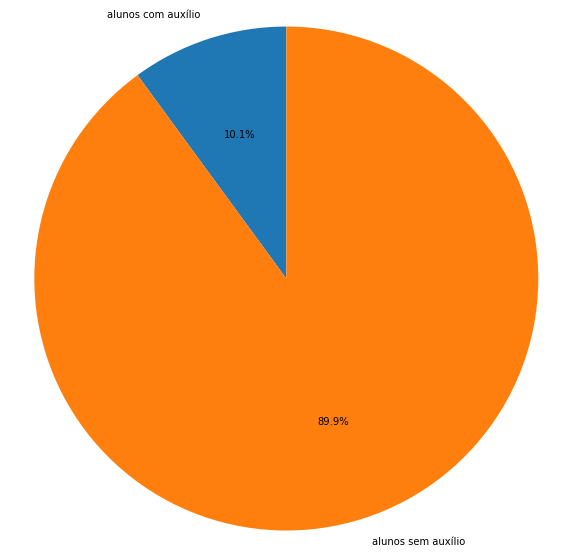

In [9]:

alunos_grad_sem_aux = Alunos_grad_df.count().sum()- quant_alunos_aux.values.sum()
labels = 'alunos com auxílio', 'alunos sem auxílio'
sizes = [quant_aux_grad.values.sum(), Alunos_grad_df.count().sum() - quant_aux_grad.values.sum()]/Alunos_grad_df.count().sum()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.rcParams["figure.figsize"] = [10, 10]
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Text(0.5, 1.0, 'Quantidade de alunos indeferidos por curso')

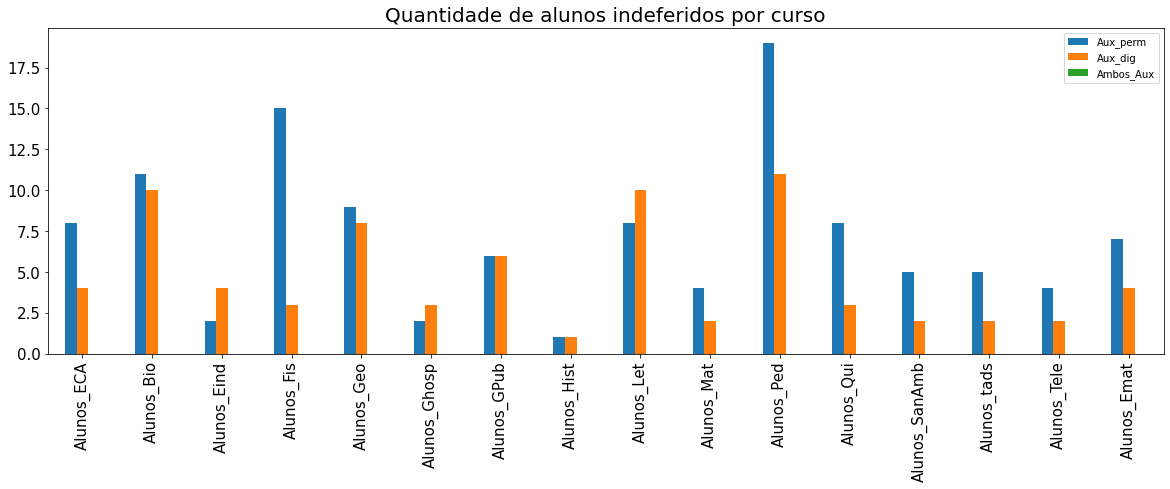

In [10]:
# Plotar o gráfico das quantidades de alunos indeferidos de cada curso

quant_alunos_indef.T.plot.bar(figsize = (20,6), fontsize= 15)
plt.title('Quantidade de alunos indeferidos por curso', fontdict= {'fontsize': 20})


Text(0.5, 1.0, 'Quantidade de alunos que recebem cada auxílio por curso')

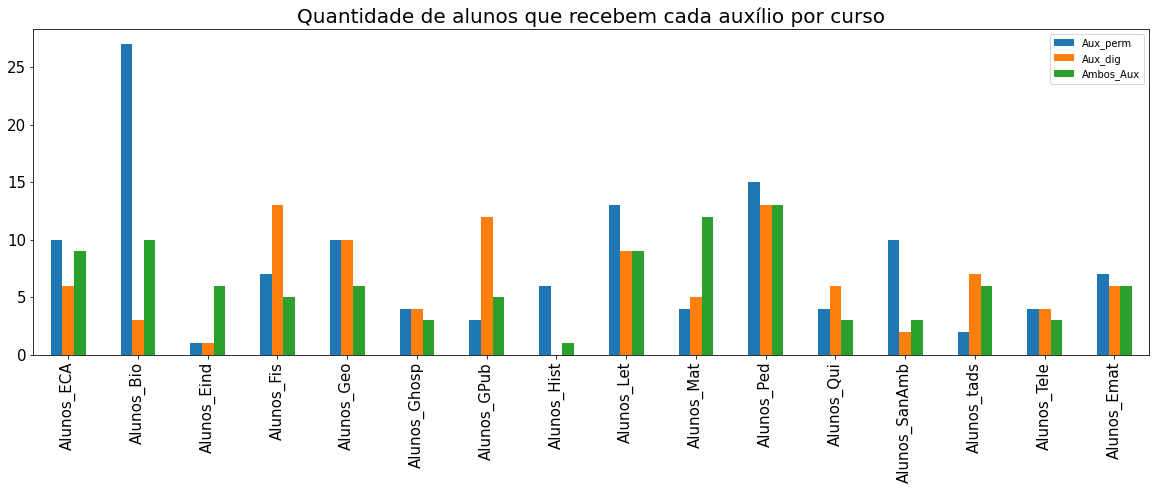

In [11]:
# Plotar o gráfico das quantidades de alunos de cada curso que recebem cada auxílio

quant_alunos_aux.T.plot.bar(figsize = (20,6), fontsize= 15)
plt.title('Quantidade de alunos que recebem cada auxílio por curso', fontdict= {'fontsize': 20})


In [12]:
# Criar um dataframe com as porcentagens de auxílios em cada curso

quant_alunos_perc = (quant_alunos_aux/Alunos_grad_df.count().tolist()*100).T
quant_alunos_perc['Não recebem'] = 100 - quant_alunos_perc['Aux_perm']- quant_alunos_perc['Aux_dig'] - quant_alunos_perc['Ambos_Aux']
quant_alunos_perc.T


,Alunos_ECA,Alunos_Bio,Alunos_Eind,Alunos_Fis,Alunos_Geo,Alunos_Ghosp,Alunos_GPub,Alunos_Hist,Alunos_Let,Alunos_Mat,Alunos_Ped,Alunos_Qui,Alunos_SanAmb,Alunos_tads,Alunos_Tele,Alunos_Emat
Aux_perm,6.84932,16.9811,2,5.64516,4.71698,8.16327,2.01342,16.2162,9.42029,2.68456,4.64396,2,8.54701,0.803213,8.51064,5.88235
Aux_dig,4.10959,1.88679,2,10.4839,4.71698,8.16327,8.05369,0,6.52174,3.3557,4.02477,3,1.7094,2.81124,8.51064,5.04202
Ambos_Aux,6.16438,6.28931,12,4.03226,2.83019,6.12245,3.3557,2.7027,6.52174,8.05369,4.02477,1.5,2.5641,2.40964,6.38298,5.04202
Não recebem,82.8767,74.8428,84,79.8387,87.7358,77.551,86.5772,81.0811,77.5362,85.906,87.3065,93.5,87.1795,93.9759,76.5957,84.0336


Text(0.5, 1.0, 'Porcentagem dos alunos que recebem cada auxílio por curso')

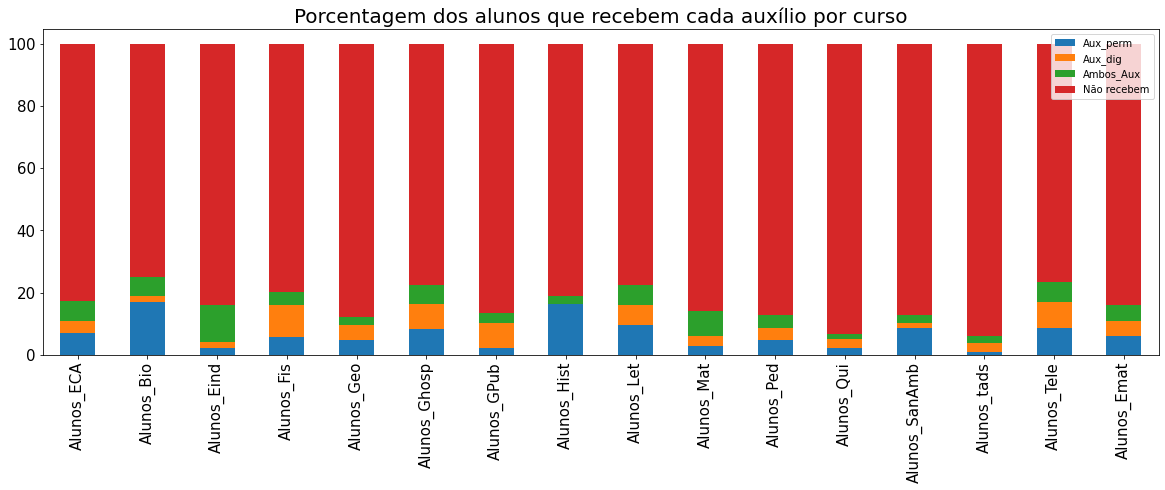

In [13]:
# Plotar o gráfico da porcentagem da quatidade de alunos em cada curso

quant_alunos_perc.plot(kind='bar',stacked = True, figsize = (20,6), fontsize= 15)

plt.title('Porcentagem dos alunos que recebem cada auxílio por curso', fontdict= {'fontsize': 20})